In [5]:
#* Predicting a Housing Prices in King County, USA

# Importing modules
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os

# Importing modules for ML
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline # for defining pipelines
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [6]:
#* DATA

# Loading data set
data_path = os.path.join("datasets", "King_County_Housing", "kc_house_data.csv")
housing_data = pd.read_csv(data_path)

In [7]:
# Exploring data set
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Droping attributes - "id", "date"
housing_data = housing_data.drop(["id", "date"], axis=1)


In [9]:
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# exploring the content about the data
housing_data.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [11]:
# exploring to see if there is a NaN values
housing_data.isnull().values.any() # no NaN values

False

In [12]:
# exploring to see specific attributes values
housing_data["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [13]:
housing_data["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [14]:
housing_data["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [15]:
housing_data["condition"].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [16]:
housing_data["grade"].value_counts()


7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [17]:
# Seeing numerical data description
housing_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

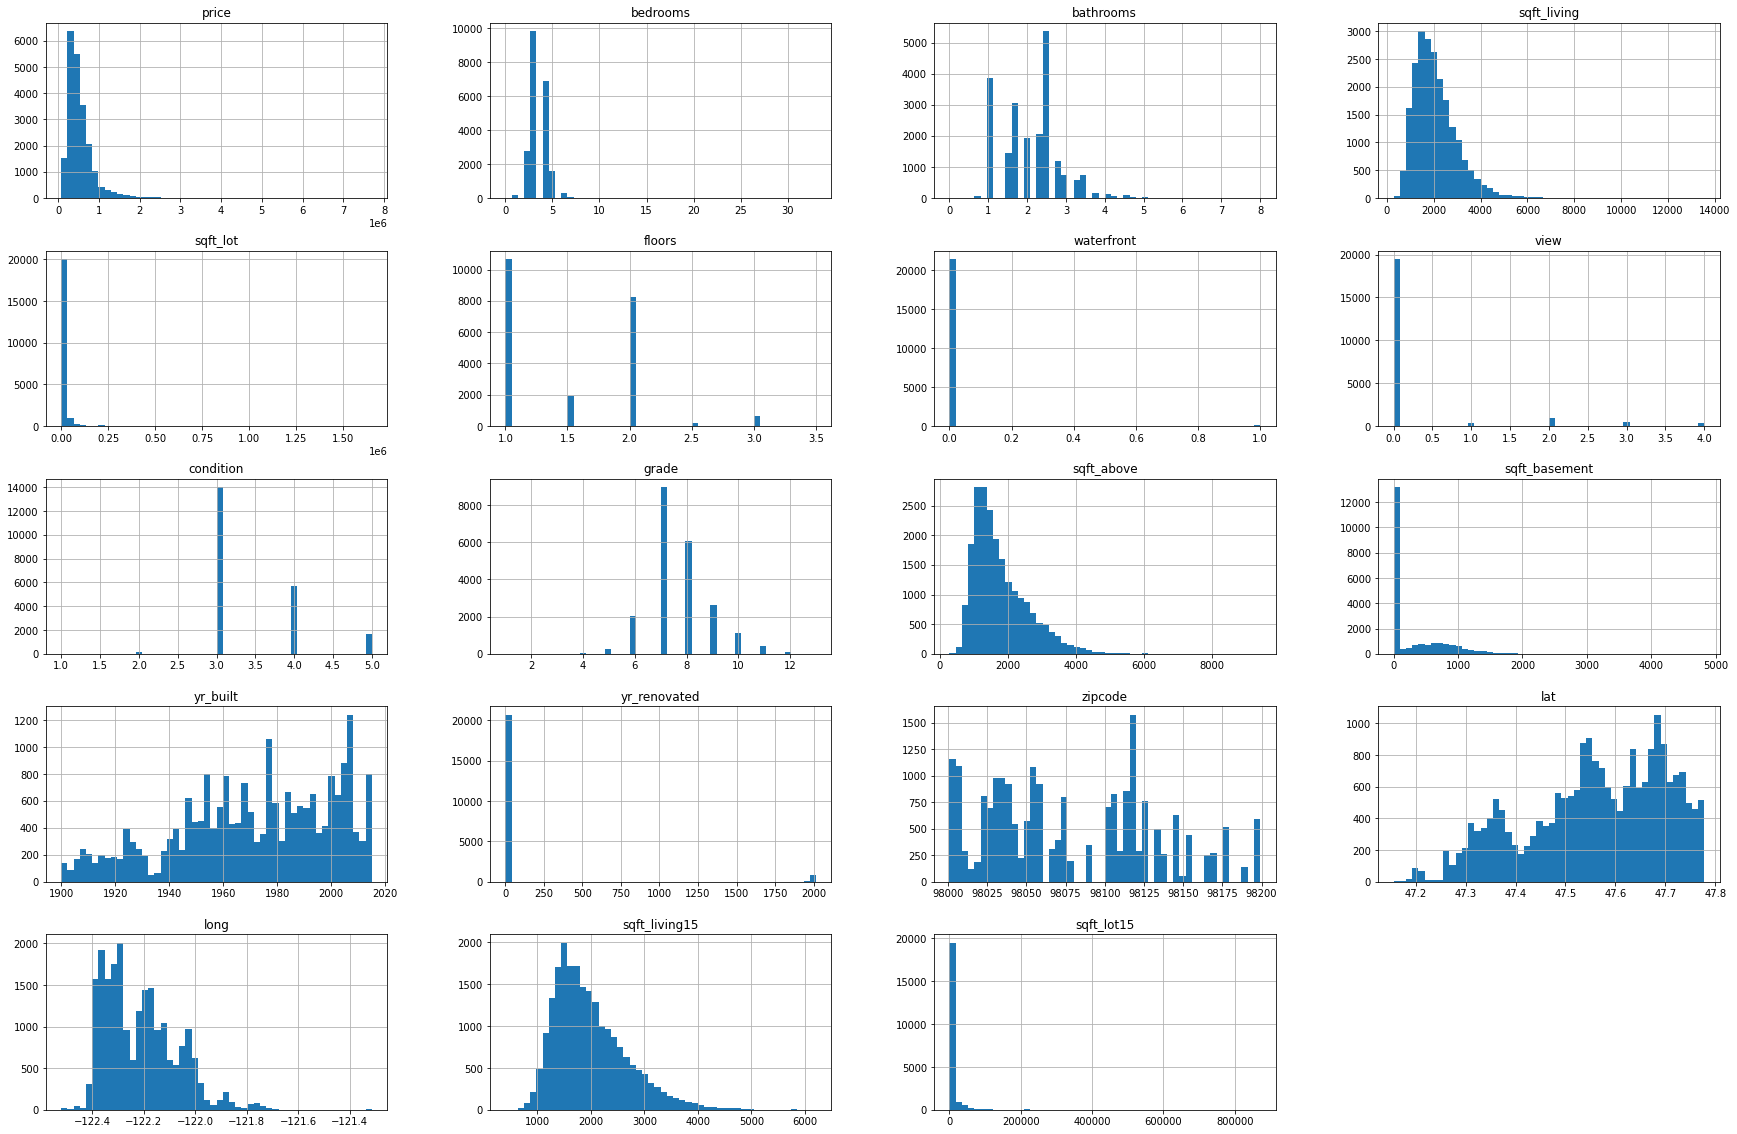

In [18]:
# Distribution of data in the dat set
housing_data.hist(bins=50, figsize=(30, 20))

In [19]:
# How well the data is represented
housing_data["sqft_living"].value_counts() / len(housing_data)

1300    0.006385
1400    0.006246
1440    0.006154
1010    0.005969
1660    0.005969
          ...   
2678    0.000046
6900    0.000046
6980    0.000046
3078    0.000046
2031    0.000046
Name: sqft_living, Length: 1038, dtype: float64

In [20]:
# Spliting data into train and test data set
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

In [21]:
# Printing the size of data
print("Train set", len(train_set))
print("Test set", len(test_set))


Train set 17290
Test set 4323


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

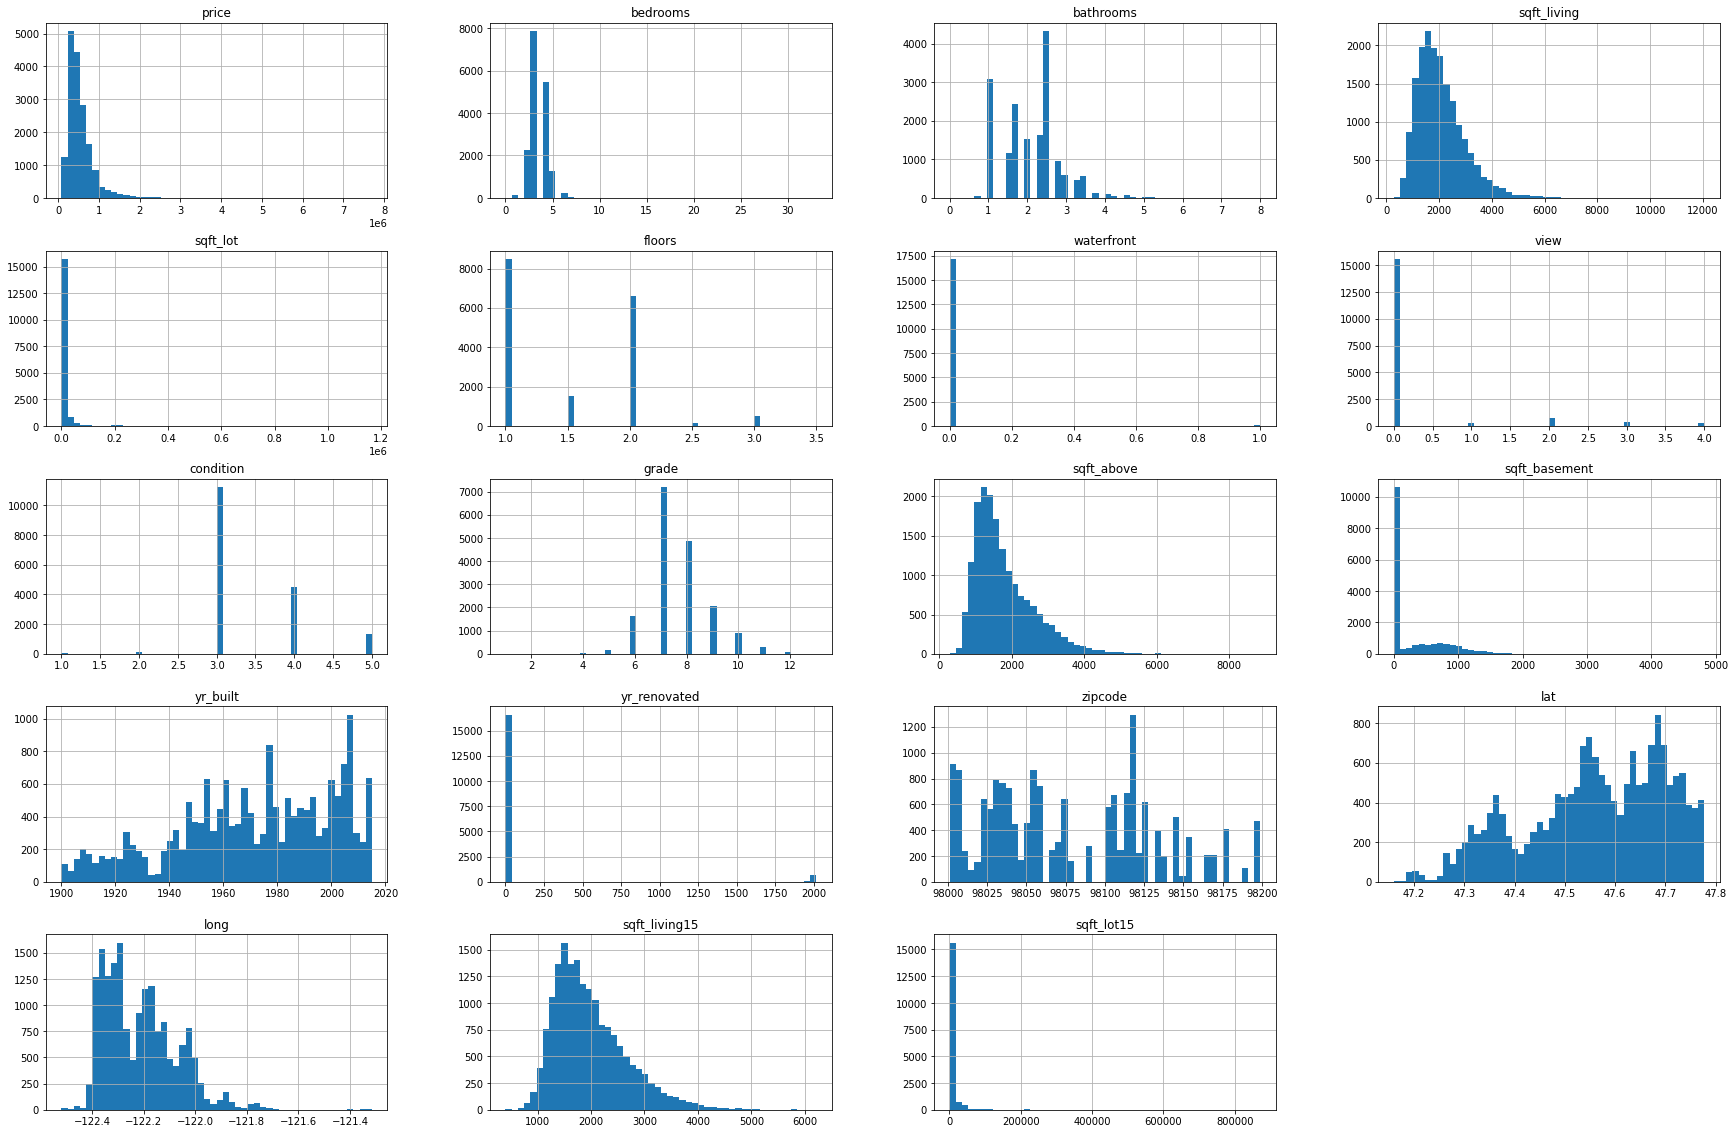

In [22]:
# checking the representation of data in train and test set
train_set.hist(bins=50, figsize=(30, 20))

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

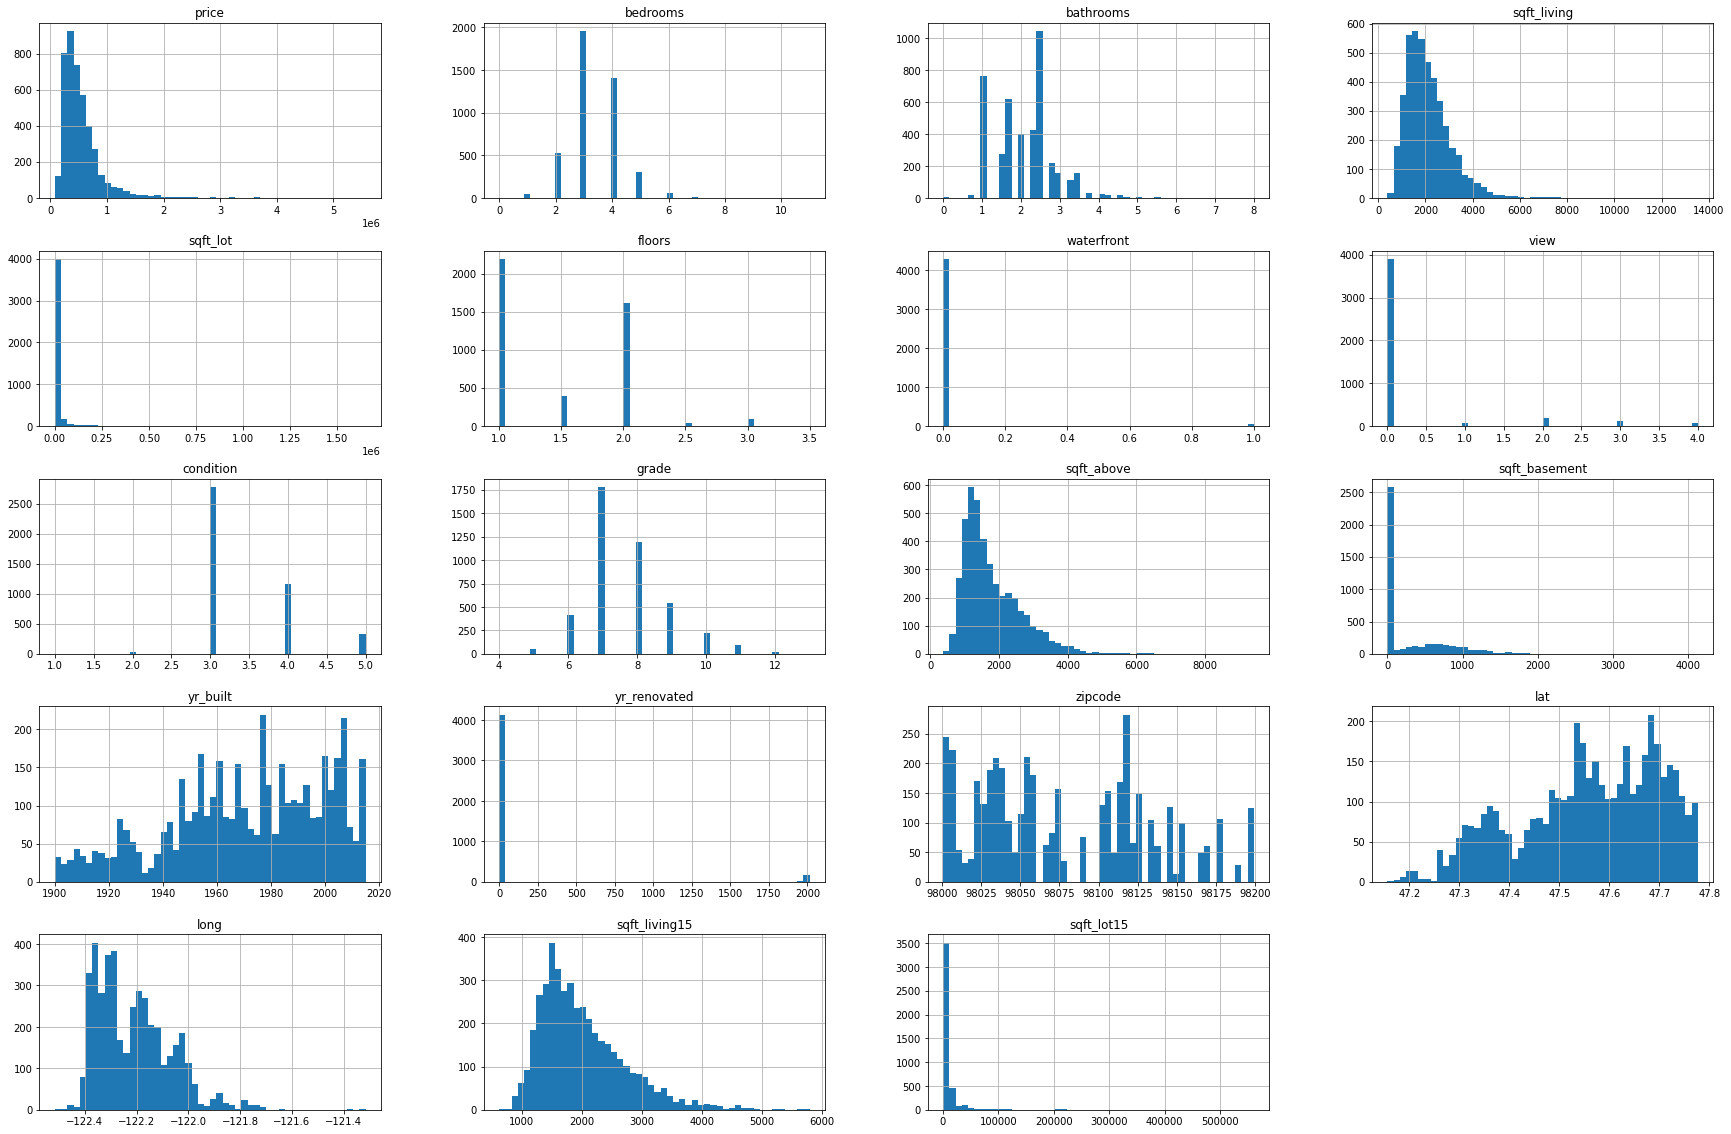

In [23]:
test_set.hist(bins=50, figsize=(30, 20))

In [24]:
test_set["bedrooms"].value_counts() / len(test_set)

3     0.453158
4     0.325006
2     0.120981
5     0.071478
6     0.013879
1     0.010641
7     0.002082
0     0.001157
8     0.000925
9     0.000231
10    0.000231
11    0.000231
Name: bedrooms, dtype: float64

In [25]:
train_set["bedrooms"].value_counts() / len(train_set)

3     0.454887
4     0.316773
2     0.129381
5     0.074725
6     0.012261
1     0.008849
7     0.001677
8     0.000521
0     0.000463
9     0.000289
10    0.000116
33    0.000058
Name: bedrooms, dtype: float64

In [26]:
# TODO: Maybe some correction of train and test data would be needed

<AxesSubplot:xlabel='long', ylabel='lat'>

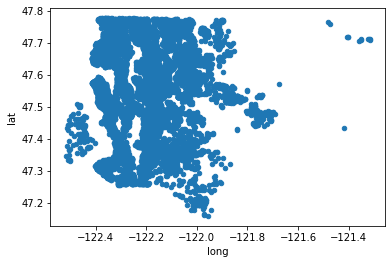

In [27]:
#* Discover data and visualize

# making a copy of train data
housing_tr = train_set.copy()

# ploting location of houses
housing_tr.plot(kind="scatter", x="long", y="lat")

<AxesSubplot:xlabel='long', ylabel='lat'>

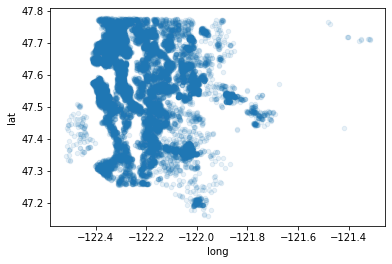

In [28]:
# ploting location of houses
housing_tr.plot(kind="scatter", x="long", y="lat", alpha = 0.1)

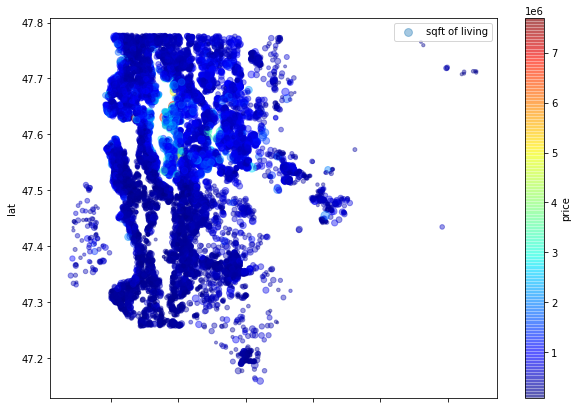

In [29]:
# ploting with colour mode
housing_tr.plot(kind="scatter", x="long", y="lat", alpha = 0.4,
                s = housing_tr["sqft_living"]/100, label = "sqft of living", figsize = (10, 7),
                c = "price", cmap = plt.get_cmap("jet"), colorbar = True,
                )
plt.legend()

In [30]:
#* Corelations

# corelation matrix
corr_matrix = housing_tr.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308262,0.526618,0.701701,0.091039,0.253425,0.252946,0.392108,0.036344,0.665093,0.603255,0.321387,0.049100,0.127737,-0.053803,0.310770,0.023486,0.582667,0.079152
bedrooms,0.308262,1.000000,0.515266,0.575048,0.031054,0.172962,-0.010044,0.070176,0.028185,0.353513,0.474386,0.300806,0.148824,0.020915,-0.152708,-0.013322,0.126010,0.386209,0.023625
bathrooms,0.526618,0.515266,1.000000,0.752745,0.086344,0.504126,0.063145,0.179657,-0.124764,0.664407,0.683303,0.277038,0.505649,0.051332,-0.202922,0.026761,0.221848,0.563438,0.079958
sqft_living,0.701701,0.575048,0.752745,1.000000,0.176264,0.348917,0.095543,0.275554,-0.056163,0.760652,0.875820,0.427831,0.315848,0.054880,-0.203540,0.053920,0.242701,0.754904,0.174895
sqft_lot,0.091039,0.031054,0.086344,0.176264,1.000000,-0.004670,0.027354,0.061524,-0.010531,0.116535,0.187159,0.014017,0.051956,0.015425,-0.135121,-0.078886,0.240164,0.151801,0.734932
floors,0.253425,0.172962,0.504126,0.348917,-0.004670,1.000000,0.018441,0.027260,-0.268652,0.457274,0.518214,-0.248916,0.495168,0.005480,-0.054722,0.054014,0.121500,0.271551,-0.012202
waterfront,0.252946,-0.010044,0.063145,0.095543,0.027354,0.018441,1.000000,0.390616,0.017313,0.070820,0.063283,0.079072,-0.030817,0.088378,0.026815,-0.018784,-0.043843,0.075609,0.032785
view,0.392108,0.070176,0.179657,0.275554,0.061524,0.027260,0.390616,1.000000,0.048571,0.244440,0.159612,0.270938,-0.058776,0.100026,0.084540,0.005750,-0.086336,0.276378,0.063760
condition,0.036344,0.028185,-0.124764,-0.056163,-0.010531,-0.268652,0.017313,0.048571,1.000000,-0.143680,-0.158199,0.180120,-0.361492,-0.061802,0.003919,-0.018660,-0.109123,-0.094194,-0.006322
grade,0.665093,0.353513,0.664407,0.760652,0.116535,0.457274,0.070820,0.244440,-0.143680,1.000000,0.752990,0.162885,0.447234,0.013731,-0.182515,0.118808,0.197489,0.707253,0.114337


In [31]:
# only for the prices
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701701
grade            0.665093
sqft_above       0.603255
sqft_living15    0.582667
bathrooms        0.526618
view             0.392108
sqft_basement    0.321387
lat              0.310770
bedrooms         0.308262
floors           0.253425
waterfront       0.252946
yr_renovated     0.127737
sqft_lot         0.091039
sqft_lot15       0.079152
yr_built         0.049100
condition        0.036344
long             0.023486
zipcode         -0.053803
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='grade', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='view', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='grade', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='sqft_living15', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='sqft_living'>,
        <AxesSubplot:xlabel='view', ylabel='sqft_living'>],
       [<AxesSubplot:xlabel='price', ylabel='grade'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='grade'>,
        <AxesSubplot:xlabel='grade', ylabe

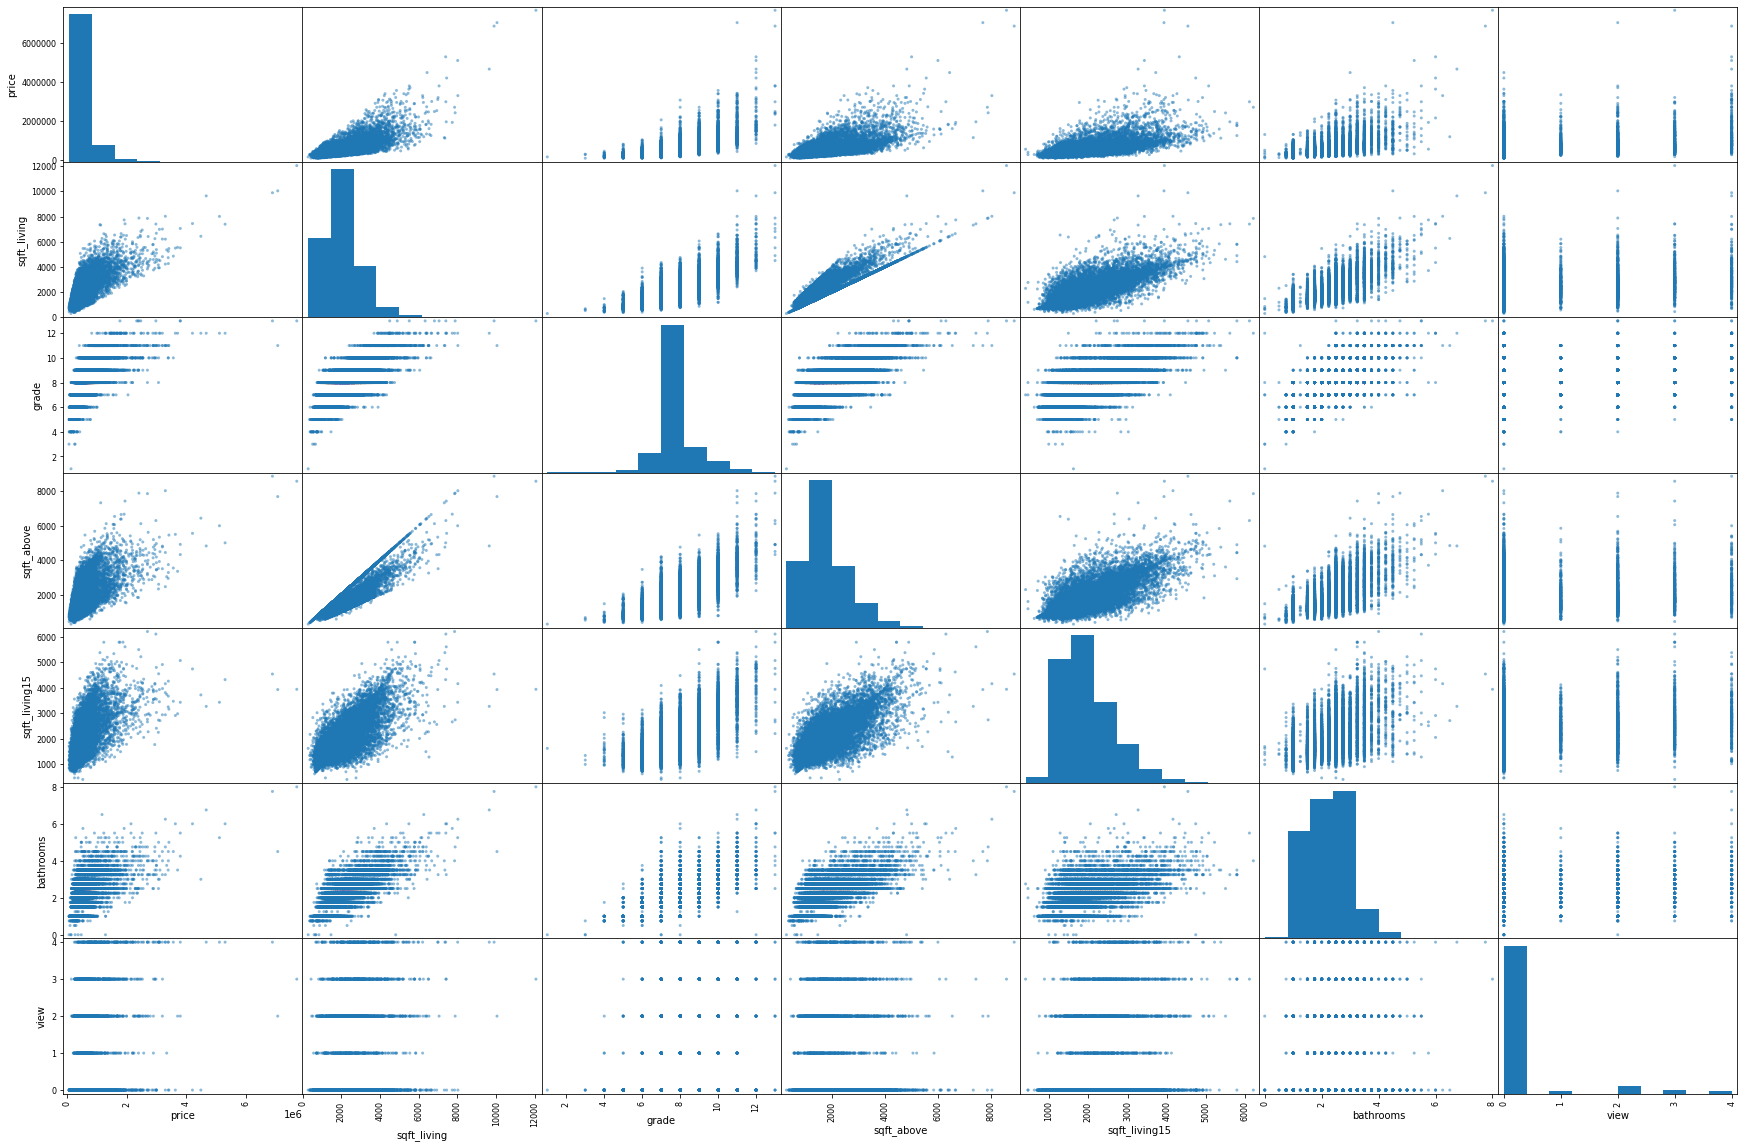

In [32]:
# Ploting the corelations
attributes = ["price", "sqft_living", "grade", "sqft_above", "sqft_living15", "bathrooms", "view"]
scatter_matrix(housing_tr[attributes], figsize=(30, 20))

In [33]:
#* Preparing the data for ML

housing_tr = train_set.drop("price", axis=1)
housing_tr_labels = train_set["price"].copy()

housing_test = test_set.drop("price", axis=1)
housing_test_labels = test_set["price"].copy()

In [34]:
#* Transforming the data

# defining a pipeline
num_pipline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [35]:
# preparing the final data
housing_tr_prepared = num_pipline.fit_transform(housing_tr)

In [36]:
housing_tr_prepared[0,:]

array([-0.39526335, -0.47445144, -0.32393262, -0.04387306, -0.91959976,
       -0.08499166, -0.30591651,  0.90907268,  1.15024328, -0.00725676,
       -0.65631017,  0.40400107, -0.20829394, -0.6746308 , -1.39660754,
        0.44228847,  1.12607326,  0.01344043])

In [37]:
#* Selecting and training a ML model

#* Linear Regression
# model
lin_reg = LinearRegression()

# training a model
lin_reg.fit(housing_tr_prepared, housing_tr_labels)

LinearRegression()

In [38]:
# making predictions 
housing_pred = lin_reg.predict(housing_tr_prepared)

# defining a function for evaluating a model
def evaluating_model(labels_true, labels_pred):
    mse = mean_squared_error(labels_true, labels_pred)
    rmse = np.sqrt(mse)
    #print("MSE: ", mse)
    print("RMSE: ", rmse)

# evaluating a model
evaluating_model(housing_tr_labels, housing_pred)

RMSE:  198276.6276375932


In [39]:
# scoring the results
lin_reg.score(housing_tr_prepared, housing_tr_labels)

0.6990888771169241

In [40]:
# evaluating a model on test data
housing_test_prepared = num_pipline.transform(housing_test)

In [41]:
# scoring the results based on test data
lin_reg.score(housing_test_prepared, housing_test_labels)

0.7012199883049014

In [42]:
#* Saving a model
import joblib

def save_models(model_dir="linear_regression", model_name="lin_reg.pkl", model=lin_reg):
    path_model = os.path.join("models",model_dir)
    if not os.path.isdir(path_model):
        os.makedirs(path_model)
    path_model_save = os.path.join(path_model, model_name)
    # saving model
    joblib.dump(model, path_model_save)
    return path_model_save

def load_models(path_model):
    return joblib.load(path_model)

In [43]:
# saving model
# save_models(model_dir="linear_regression", model_name="lin_reg.pkl", model=lin_reg)

In [44]:
#* Testing the DecisionTreeRegressor Model

# model
tree_reg = DecisionTreeRegressor()

# training a model
tree_reg.fit(housing_tr_prepared, housing_tr_labels)

DecisionTreeRegressor()

In [45]:
# predictions
housing_predict = tree_reg.predict(housing_tr_prepared)

In [46]:
# evaluating a model
evaluating_model(housing_tr_labels, housing_predict)

RMSE:  9992.401913529287


In [47]:
# socring
tree_reg.score(housing_tr_prepared, housing_tr_labels)

0.9992357508194403

In [48]:
# evaluating a model on test data
housing_test_prepared = num_pipline.transform(housing_test)

In [49]:
housing_test_prepared[0,:]

array([ 0.67843709,  0.17763643, -0.00429299, -0.15206572,  0.92268978,
       -0.08499166, -0.30591651,  0.90907268,  0.29577684,  0.34571197,
       -0.65631017,  0.50592142, -0.20829394, -0.37458134, -0.87792626,
        0.37111117,  0.59760397, -0.18256703])

In [50]:
housing_test_pred = tree_reg.predict(housing_test_prepared)

In [51]:
# evaluating a model
evaluating_model(housing_test_labels, housing_test_pred)

RMSE:  210793.60272149806


In [52]:
tree_reg.score(housing_test_prepared, housing_test_labels)

0.706079446463862

In [53]:
# Doing cross validation - Decision Tree
tree_scores = cross_val_score(tree_reg, housing_tr_prepared, housing_tr_labels, scoring="neg_mean_squared_error", cv=10)

# evaluating a model
tree_rmse_scores = np.sqrt(-tree_scores)

# function for printing results
def disply_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    

# printing results
disply_scores(tree_rmse_scores)

Scores:  [175155.61434165 200283.07612841 169563.87815902 170973.94643679
 168790.23622663 185734.86157973 163954.65993143 184824.23749389
 192083.39497524 174484.81726732]
Mean:  178584.8722540113
Standard deviation:  11049.556495525547


In [54]:
# Doing cross validation - Decision Tree
lin_scores = cross_val_score(lin_reg, housing_tr_prepared, housing_tr_labels, scoring="neg_mean_squared_error", cv=10)

# evaluating a model
lin_rmse_scores = np.sqrt(-lin_scores)

# printing results
disply_scores(lin_rmse_scores)

Scores:  [189468.91141177 248730.46203094 187684.35343115 223164.09885169
 175668.99408443 210643.55877286 186481.38172258 188109.14873263
 182697.02078062 185491.9596633 ]
Mean:  197813.9889481979
Standard deviation:  21599.376935276203


In [55]:
# Trying Model RandomForestRegressor

# model type
forest_reg = RandomForestRegressor()

# model training
forest_scores = cross_val_score(forest_reg, housing_tr_prepared, housing_tr_labels, scoring="neg_mean_squared_error", cv=10)

# model evaluation
forest_mse = np.sqrt(-forest_scores)

# printing results
disply_scores(forest_mse)

Scores:  [123113.51165124 161928.6027772  116464.78724546 138580.16637184
 117316.85673545 130540.90324987 114207.64271352 120124.61357234
 121894.48028879 121600.16953208]
Mean:  126577.17341377916
Standard deviation:  13604.618057117492


In [56]:
# fiting the model
forest_reg.fit(housing_tr_prepared, housing_tr_labels)

# predictions
house_predict = forest_reg.predict(housing_tr_prepared)

# evaluating a model - Train data set
evaluating_model(housing_tr_labels, house_predict)

# predictions - test set
house_pred_test = forest_reg.predict(housing_test_prepared)
# evaluating a model - Test data set
evaluating_model(housing_test_labels, house_pred_test)

RMSE:  47775.22910947093
RMSE:  149344.4340440959


In [57]:
forest_reg.score(housing_tr_prepared, housing_tr_labels)

0.9825296843884699

In [59]:
# score on testing data
forest_reg.score(housing_test_prepared, housing_test_labels)

0.8524656367572266

In [70]:
# Prediction on a sample data
test_sample = housing_test.iloc[:5]
test_labels = housing_test_labels.iloc[:5]

In [71]:
test_sample_prepared = num_pipline.transform(test_sample)

In [73]:
# predictions - test set
house_pred_test = forest_reg.predict(test_sample_prepared)
# evaluating a model - Test data set
print("Preditions: ", house_pred_test)
print("Lables: ", list(test_labels))

Preditions:  [ 375312.    937033.5  1113760.5  2081655.5   713687.88]
Lables:  [365000.0, 865000.0, 1038000.0, 1490000.0, 711000.0]


In [85]:
#* Hyperparameter tuning

# using Grid search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
]

# defining a model
forest_reg = RandomForestRegressor()

# defining a grid search to explore different hyperparameters
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# training the model
grid_search.fit(housing_tr_prepared, housing_tr_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100]},
                         {'bootstrap': [False],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
# seeing the best parameters
grid_search.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 50}

In [87]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50)

In [88]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

174538.320017046 {'max_features': 2, 'n_estimators': 3}
148788.89671436604 {'max_features': 2, 'n_estimators': 10}
142259.0113993933 {'max_features': 2, 'n_estimators': 30}
140527.14510368244 {'max_features': 2, 'n_estimators': 50}
139185.54253904294 {'max_features': 2, 'n_estimators': 100}
163324.63992946292 {'max_features': 4, 'n_estimators': 3}
139976.77929048508 {'max_features': 4, 'n_estimators': 10}
131495.06941538732 {'max_features': 4, 'n_estimators': 30}
130375.14054806315 {'max_features': 4, 'n_estimators': 50}
129730.04013575744 {'max_features': 4, 'n_estimators': 100}
158531.84260594822 {'max_features': 6, 'n_estimators': 3}
135139.25298264474 {'max_features': 6, 'n_estimators': 10}
130023.85246134854 {'max_features': 6, 'n_estimators': 30}
128411.67814823284 {'max_features': 6, 'n_estimators': 50}
127834.72658579274 {'max_features': 6, 'n_estimators': 100}
151456.92376916506 {'max_features': 8, 'n_estimators': 3}
135655.07896342117 {'max_features': 8, 'n_estimators': 10}
1

In [89]:
# Testing out the model
model_best = grid_search.best_estimator_

# prediction
house_predit = model_best.predict(housing_tr_prepared)

# evaluation
model_mse = mean_squared_error(housing_tr_labels, house_predit)
model_rmse = np.sqrt(model_mse)
print(model_rmse)

9992.401971410165


In [90]:
# Model score on train set
model_best.score(housing_tr_prepared, housing_tr_labels)

0.9992357508105865

In [91]:
# Model score on test set
model_best.score(housing_test_prepared, housing_test_labels)

0.8499007953250577

In [92]:
#* Ensamble methods

# Analizing the best models

# Exploring the relative importance of the attributes
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00350841, 0.04168329, 0.21102946, 0.01584627, 0.00239873,
       0.02517779, 0.01880852, 0.00367652, 0.2442304 , 0.07072236,
       0.0115511 , 0.0363661 , 0.00243962, 0.02198206, 0.14522988,
       0.06173227, 0.06770083, 0.0159164 ])

In [93]:
# connecting the importance number to the correct attributes

attributes = list(housing_tr)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2442303962706804, 'grade'),
 (0.2110294570633818, 'sqft_living'),
 (0.1452298770233094, 'lat'),
 (0.07072236080862442, 'sqft_above'),
 (0.067700829301884, 'sqft_living15'),
 (0.061732265233596026, 'long'),
 (0.04168328696901348, 'bathrooms'),
 (0.03636610317875502, 'yr_built'),
 (0.025177792286570126, 'waterfront'),
 (0.0219820615244319, 'zipcode'),
 (0.018808517332613163, 'view'),
 (0.015916404337556873, 'sqft_lot15'),
 (0.01584627102797958, 'sqft_lot'),
 (0.011551096607813283, 'sqft_basement'),
 (0.0036765207192775637, 'condition'),
 (0.0035084128294725256, 'bedrooms'),
 (0.002439621502291311, 'yr_renovated'),
 (0.00239872598274896, 'floors')]

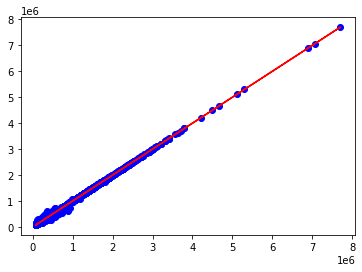

In [96]:
plt.scatter(housing_tr_labels, house_predit, color="b")
plt.plot(housing_tr_labels, housing_tr_labels, color="r")
plt.show()

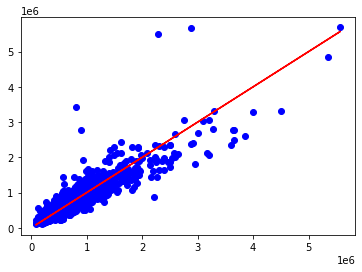

In [97]:
house_predit = model_best.predict(housing_test_prepared)
plt.scatter(housing_test_labels, house_predit, color="b")
plt.plot(housing_test_labels, housing_test_labels, color="r")
plt.show()

In [98]:
housing_tr.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


In [99]:
# Test with droping the zip column

housing_tr_new = housing_tr.drop("zipcode", axis=1)

In [100]:
housing_tr_new.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,47.3670,-122.152,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,47.5520,-122.290,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,47.4838,-122.335,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,47.3951,-122.172,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,47.7043,-122.209,2090,10454


In [101]:
# Preparing a data
housing_tr_new_pre = num_pipline.fit_transform(housing_tr_new)

In [102]:
# model
rand_tree = RandomForestRegressor()

# training / fiting
rand_tree.fit(housing_tr_new_pre, housing_tr_labels)

# prediction
housing_pred = rand_tree.predict(housing_tr_new_pre)

# evaluate the model - training data
evaluating_model(housing_tr_labels, housing_pred)

# evaluating the score
rand_tree.score(housing_tr_new_pre, housing_tr_labels)

RMSE:  48617.17451559606


0.9819084979932486

In [103]:
# testing data
housing_test_new = housing_test.drop("zipcode", axis=1)
housing_test_new_pr = num_pipline.transform(housing_test_new)

# prediction
housing_predict = rand_tree.predict(housing_test_new_pr)

# evaluate the model - test data
evaluating_model(housing_test_labels, housing_predict)

# evaluating the score
rand_tree.score(housing_test_new_pr, housing_test_labels)

RMSE:  145888.88106285012


0.8592139933456906

In [104]:
param_grid = [
    {'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8, 10]},
]

# defining a model
forest_reg = RandomForestRegressor()

# defining a grid search to explore different hyperparameters
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# training the model
grid_search.fit(housing_tr_new_pre, housing_tr_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100]},
                         {'bootstrap': [False],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [106]:
# Testing out the model
model_best = grid_search.best_estimator_

# prediction
house_predit = model_best.predict(housing_tr_new_pre)

# evaluation
model_mse = mean_squared_error(housing_tr_labels, house_predit)
model_rmse = np.sqrt(model_mse)
print(model_rmse)

9992.404908864291


In [107]:
# Model score on train set
model_best.score(housing_tr_new_pre, housing_tr_labels)

0.9992357503612556

In [108]:
# Model score on test set
model_best.score(housing_test_new_pr, housing_test_labels)

0.8591370391083915